<a href="https://colab.research.google.com/github/akashf/DataScience/blob/master/DeepLearning_Lab_Classification_Models_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The <strong>MNIST database</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
    
The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

Also, this way, will get to compare how conventional neural networks compare to convolutional neural networks, that we will build in the next module.

## Import Keras and Packages

Let's start by importing Keras and some of its modules.

In [0]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Since we are dealing we images, let's also import the Matplotlib scripting layer in order to view the images.

In [0]:
import matplotlib.pyplot as plt

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/). 

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.

In [0]:
from keras.datasets import mnist
#Read the data
(X_train,y_train), (X_test,y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

In [57]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.
<br>
Let's visualize the first image in the training set using Matplotlib's scripting layer.

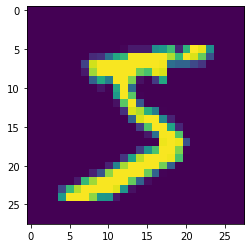

In [58]:

plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [0]:
#flating images into one dimension vector
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [0]:
#normailizing code wtih respect to pixels 
X_train = X_train/255
X_test = X_test/255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.

In [61]:
#one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network

In [0]:
#defing a classification model
def classification_model():
  #create model
  model = Sequential()
  model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))

  #compile model
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

Train and Test the Network

In [63]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 18s - loss: 0.1837 - accuracy: 0.9439 - val_loss: 0.0859 - val_accuracy: 0.9742
Epoch 2/10
 - 18s - loss: 0.0794 - accuracy: 0.9746 - val_loss: 0.0734 - val_accuracy: 0.9774
Epoch 3/10
 - 18s - loss: 0.0530 - accuracy: 0.9829 - val_loss: 0.0828 - val_accuracy: 0.9764
Epoch 4/10
 - 18s - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0863 - val_accuracy: 0.9753
Epoch 5/10
 - 18s - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0984 - val_accuracy: 0.9726
Epoch 6/10
 - 18s - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0769 - val_accuracy: 0.9809
Epoch 7/10
 - 18s - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.0918 - val_accuracy: 0.9771
Epoch 8/10
 - 18s - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0945 - val_accuracy: 0.9786
Epoch 9/10
 - 18s - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0910 - val_accuracy: 0.9803
Epoch 10/10
 - 18s - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.1076 - val_accuracy: 0.9784


Let's print accuracy and the correspongi error 

In [64]:
print ("Accurach is : [] \n Error : {}".format(scores[1],1-scores[1]))

Accurach is : [] 
 Error : 0.9783999919891357


In [0]:
model.save('classification_model.h5')

Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.

#### Since our model contains
 multidimensional arrays of data, then models are usually saved as .h5 files.
 When you are ready to use your model again, you use the load_model function from <strong>keras.models</strong>.

In [0]:
from keras.models import load_model

In [0]:
pretrained_model = load_model('classification_model.h5')